In [1]:
import warnings
warnings.filterwarnings("ignore")

from scipy.sparse import csc_matrix, linalg

from math import factorial, floor
import numpy as np

import matplotlib.pyplot as plt
font = {'size'   : 14}
plt.rc('font', **font)

In [2]:
def Vfunction(i, N):
    sum1 = 0.
    kmin = int(floor((i + 1.) / 2.))
    kmax = min(i, N)
    for k in range(kmin, kmax+1):
        sum1 += (1.*(k**N) * factorial(2 * k) / (factorial(N - k) * factorial(k) * factorial(k - 1) * factorial(i - k) * factorial(2 * k - i)))
    return ((-1.)**(N + i)) * sum1

In [3]:
def solve(matrixR,vectorF):
    return linalg.spsolve(csc_matrix(matrixR, dtype=float), csc_matrix(vectorF, dtype=float)) # only for nCells <= 100 x 100

    # Iterative solvers###################################
    # Minimal residual iterative method (krylov) # can reach to nCells = 400 x 400 or more
    '''
    A = csc_matrix(matrixR, dtype=float)
    A = A + A.T
    vectorU, exitCode = scipy.sparse.linalg.minres(A, vectorF,tol=1e-100, maxiter=10000, show=False)
    print(np.allclose(A.dot(vectorF), vectorU))
    return vectorU'''

In [4]:
def rigidity(n, s, x,y, cxx,cyy,cf, phi,e):
    nCell = n*n
    M = np.zeros((nCell,nCell))
    for i in range(1,n-1):
        for j in range(1,n-1):
            iCell = i*n + j
            iW = (i-1)*n + j
            iE = (i+1)*n + j
            iS = iCell - 1
            iN = iCell + 1

            l1 = (y[i][j+1]-y[i][j-1])/2.
            l2 = (x[i+1][j]-x[i-1][j])/2.

            c1xi  = (cxx[i][j] + cxx[i-1][j]) /2. /l2 /(x[i][j] - x[i-1][j])
            c2eta =-(cyy[i][j+1] + cyy[i][j]) /2. /l1 /(y[i][j+1] - y[i][j])
            c3xi  =-(cxx[i+1][j] + cxx[i][j]) /2. /l2 /(x[i+1][j] - x[i][j])
            c4eta = (cyy[i][j] + cyy[i][j-1]) /2. /l1 /(y[i][j] - y[i][j-1])

            M[iCell][iCell] = s + c1xi - c2eta - c3xi + c4eta

            M[iCell][iW] = -c1xi         
            M[iCell][iN] = c2eta
            M[iCell][iE] = c3xi
            M[iCell][iS] = -c4eta


    # Fracture
    i = int(n/2.)
    for j in range(int(40.*n/101.),int(60.*n/101.)): 
    # the end range of int(3.*n/4.)-1 caused a day long issue

        iCell = i*n + j
        for k in range(0,nCell):
            M[iCell][k] = 0. 


        iW = (i-1)*n + j
        iE = (i+1)*n + j
        iS = iCell - 1
        iN = iCell + 1

        l1 = (y[i][j+1]-y[i][j-1])/2.
        l2 = (x[i+1][j]-x[i-1][j])/2.




        cfW  = phi*(cxx[i][j] + cxx[i-1][j]) /2. /(x[i][j] - x[i-1][j])

        cfE  = -phi*(cxx[i+1][j] + cxx[i][j]) /2. /(x[i+1][j] - x[i][j])


        M[iCell][iCell] = s + 2.*cf/l1**2. + cfW - cfE



        M[iCell][iN] = -cf/l1**2.
        M[iCell][iS] = -cf/l1**2.
        M[iCell][iW] = -cfW         
        M[iCell][iE] = cfE



    # Fracture tip 1
    i = int(n/2.)
    j = int(40.*n/101.)


    iCell = i*n + j
    for k in range(0,nCell):
        M[iCell][k] = 0. 

    iW = (i-1)*n + j
    iE = (i+1)*n + j
    iS = iCell - 1
    iN = iCell + 1

    l1 = (y[i][j+1]-y[i][j-1])/2.
    l2 = (x[i+1][j]-x[i-1][j])/2.



    cfW  = phi*(cxx[i][j] + cxx[i-1][j]) /2. /(x[i][j] - x[i-1][j])

    cfE  = -phi*(cxx[i+1][j] + cxx[i][j]) /2. /(x[i+1][j] - x[i][j])


    # Removing ctS allow a best fit for high matrix permeability, steady state regime
    #coeffff = 0.
    #ctS = coeffff*phi*l2/e*(cyy[i][j] + cyy[i][j-1]) /2. /(y[i][j] - y[i][j-1])

    M[iCell][iCell] = s + cf/l1**2. + cfW - cfE #+ ctS


    M[iCell][iN] = -cf/l1**2.
    #M[iCell][iS] = -ctS
    M[iCell][iW] = -cfW         
    M[iCell][iE] = cfE

    # Fracture tip 2
    i = int(n/2.)
    j = int(60.*n/101.)

    iCell = i*n + j
    for k in range(0,nCell):
        M[iCell][k] = 0. 

    iW = (i-1)*n + j
    iE = (i+1)*n + j
    iS = iCell - 1
    iN = iCell + 1

    l1 = (y[i][j+1]-y[i][j-1])/2.
    l2 = (x[i+1][j]-x[i-1][j])/2.





    cfW  = phi*(cxx[i][j] + cxx[i-1][j]) /2. /(x[i][j] - x[i-1][j])

    cfE  = -phi*(cxx[i+1][j] + cxx[i][j]) /2. /(x[i+1][j] - x[i][j])

    # Removing ctN allow a best fit for high matrix permeability, steady state regime

    #ctN  = coeffff* (  -phi*l2/e*(cyy[i][j+1] + cyy[i][j]) /2. /(y[i][j+1] - y[i][j])  )

    M[iCell][iCell] = s + cf/l1**2. + cfW - cfE #- ctN



    #M[iCell][iN] = ctN
    M[iCell][iS] = -cf/l1**2.
    M[iCell][iW] = -cfW         
    M[iCell][iE] = cfE

    # Pressure boundary condition on top and bottom sides  

    for i in range(0,n):
        for j in range(0,nCell):
            #M[i][j] = 0
            M[(i+1)*n-1][j] = 0. 
            #M[nCell-1-i][j] = 0
            M[i*n][j] = 0.

        #M[i][i] = 1
        M[(i+1)*n-1][(i+1)*n-1] = 1. 
        #M[nCell-1-i][nCell-1-i] = 1
        M[i*n][i*n] = 1. 

    # Flow rate boundary condition on left and right sides    
    for i in range(1,n-1): # 1 to n-1 to avoid the boundaries where pressure is imposed, this allows avoiding an issue related to 2x pressure at the first cell
        for j in range(0,nCell):
            M[i][j] = 0.
            #M[(i+1)*n-1][j] = 0 
            M[nCell-1-i][j] = 0.
            #M[i*n][j] = 0

        M[i][i] = 1.
        M[i][i+n] = -1.

        #M[(i+1)*n-1][(i+1)*n-1] = 1 
        #M[(i+1)*n-1][(i+1)*n-2] = -1

        M[nCell-1-i][nCell-1-i] = 1.
        M[nCell-1-i][nCell-1-i-n] = -1.

        #M[i*n][i*n] = 1 
        #M[i*n][i*n+1] = -1  

    return M

In [5]:
p0 = 0.
pTop = 5
pBot = -5
L = 10.
e = 1e-5


n = 101 # Highly mesh sensible for large time transient regime, this may be avoided by removing time dependent term in the fracture
#x, y = np.mgrid[0:L:n*1j, 0:L:n*1j]
x, y = np.mgrid[-L/2.:L/2.:n*1j, -L/2.:L/2.:n*1j]

t = 1e6

muf = 1e-3

c_fluid = 5e-10
kappa = 1e-18/muf
phi = 0.1

# Biot's modulus
M = 1./(phi*c_fluid)

# Diffusion coefficient
c = kappa * M



cf = e**3./12./muf/c_fluid  

cxx = np.r_[c*np.ones((int(n/2.),n)), c*np.ones((n-int(n/2.),n)) ]
cyy = cxx

# Force
nCell = n*n
#f = np.zeros((nCell,1))
f = np.zeros(nCell)

# Pressure boundaries condition 
    
for i in range(0,n):

    #f[i] = 0
    f[(i+1)*n-1] = pTop
    #f[nCell-1-i] = 0
    f[i*n] = pBot
  
f = f.reshape(len(f),1)

# Solving the linear equation system by the fast Laplace-Stehfest method
N = 2
sum_p = np.zeros(nCell)

for j in range(1,2*N+1):
	s = j * np.log(2.) / t

	M = rigidity(n,s,x,y,cxx,cyy,cf,phi,e)
	
	p = solve(M,f/s)

	sum_p += Vfunction(j,N) * p

p = sum_p * np.log(2.) / t

p+=p0

p = p.reshape(n,n)

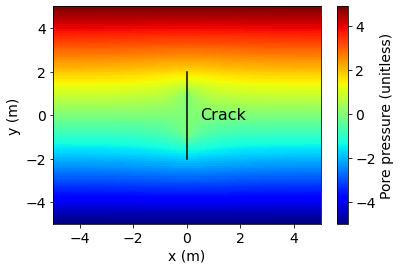

In [6]:
plt.pcolor(x, y, p, cmap='jet')
colorbar = plt.colorbar()
colorbar.set_label('Pore pressure (unitless)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.plot([0,0],[-2,2],'k')
plt.text(0.5, 0, 'Crack', ha='left', va='center', fontsize=16)
plt.show()

In [7]:
def analytic(A, L, r, theta):
    return A*np.sqrt(L)*np.sqrt((r**2-L**2)*(1.0+np.cos(theta)))
    #return np.sqrt((r**2-L**2))
    

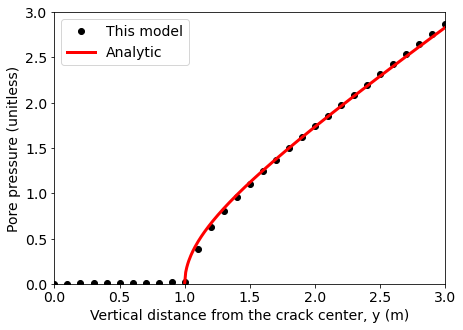

In [8]:
p_TFVM = []
y_TFVM = []

for i in range(0, n):
	
	p_TFVM.append(p[int(n/2)][i])

	y_TFVM.append(y[int(n/2)][i])


'''
y = []
p = []
for line in open('pressure.curve', 'r'):
	if not (line.strip().startswith("#") or line.strip()==''):
		values = [float(s) for s in line.split()]
		y.append(values[0]-5.)
		p.append(values[1])
'''

fig = plt.figure(figsize=[7.,5])

plt.subplot(111)
#plt.plot(y,p,'ko',label='GEOSX')
plt.plot(y_TFVM,p_TFVM,'ko',label='This model')

r = np.linspace(1,5,500)
plt.plot(r,analytic(1, 1, r, np.pi/2.0),'r',linewidth=3,label='Analytic')

plt.xlabel('Vertical distance from the crack center, y (m)')
#plt.xlim(-3.,3.)
plt.ylabel('Pore pressure (unitless)')
plt.xlim(0,3)
plt.ylim(0,3)
plt.legend()
plt.show()